# 2D Embedding manifold plot using Isomap

*18/2/2022*

This notebook demonstrates how to visualise the embedding space by extracting an
embedding manifold using the [Isomap](https://scikit-learn.org/stable/modules/manifold.html#isomap)
and rendering the triplets where the anchor-neighbor distant is the smallest (assuming that
these tile-pairs are ones where the model was able to work out at they contained similar structure,
i.e. a similar kind of cloud organisation across the whole tile).

In [1]:
from convml_tt.interpretation.plots import isomap2d
from convml_tt.data.examples import (
    fetch_example_dataset,
    ExampleData,
    load_pretrained_model,
    PretrainedModel,
)
from convml_tt.utils import get_embeddings
from convml_tt.data.dataset import ImageTripletDataset, TileType
from convml_tt.data.transforms import get_transforms

from pathlib import Path
import xarray as xr

In [4]:
data_path = fetch_example_dataset(dataset=ExampleData.LARGE2000S500)
data_path

  0%|          | 0/1092419466 [00:00<?, ?it/s]

Extracting data/Nx256_s200000.0_N500study_N2000train.tgz to data/


PosixPath('data/Nx256_s200000.0_N500study_N2000train')

In [5]:
model = load_pretrained_model(pretrained_model=PretrainedModel.FIXED_NORM_STAGE2)

  0%|          | 0/43696025 [00:00<?, ?it/s]

Extracting data/fixednorm-stage-2.tgz to data/
Weights loaded from `data/fixednorm-stage-2.torch.pkl`


In [6]:
dataset = ImageTripletDataset(
    data_dir=data_path,
    transform=get_transforms(step="predict", normalize_for_arch=model.base_arch),
)

In [8]:
da_embs = get_embeddings(
    tile_dataset=dataset,
    model=model,
    prediction_batch_size=4,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Predicting: 0it [00:00, ?it/s]

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

TypeError: object of type 'NoneType' has no len()

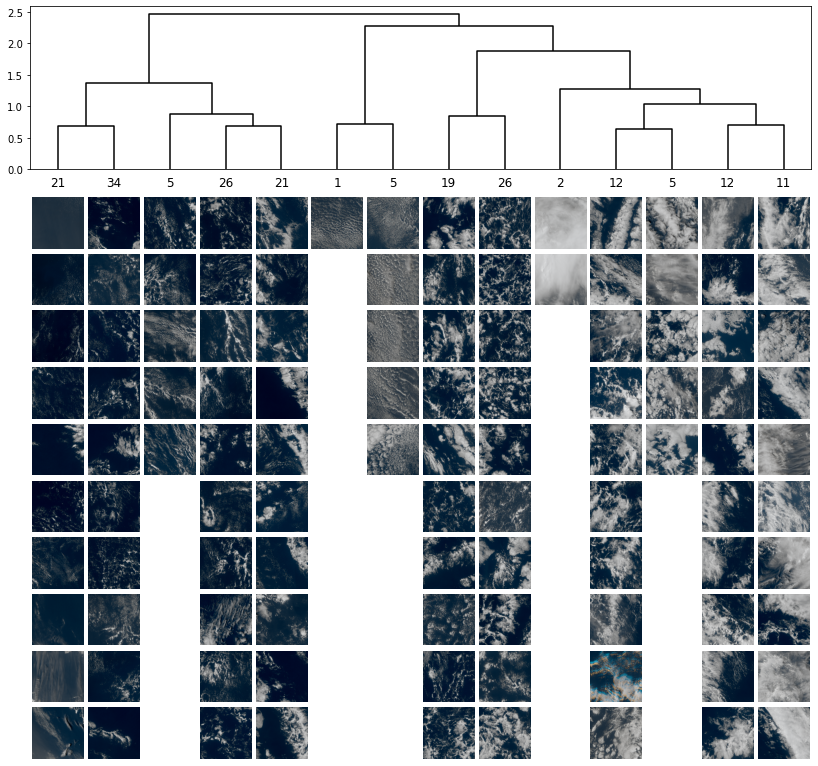

In [6]:
dendrogram(
    da_embeddings=da_embs,
    tile_type="anchor",
    n_clusters_max=14,
    n_samples=10,
    sampling_method="best_triplets",
)